<a href="https://colab.research.google.com/github/GabrielaRomoM/DSP2024-2/blob/main/Taller_2_%5B201124%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Taller 2:

1. Crear una señal con diferentes frecuencias (10,20,30,...,100 Hz).
2. Agregar Ruido Blanco Gaussiano (0.3).
3. Calcular FFT (Signal -> FFT = W).
4. Calcular a la FFT la inversa para obtener la señal original (W -> IFFT = Signal).
4. Crear un filtro (sin aplicar filtros, puede ser con un escalon, etc) y cortar armonicos de tal forma que queden solo 3 o 4 (W=W_f).
5. Aplicar a la señal con armonicos filtrados resultante la inversa para obtener la señal original pero sin los armonicos que fueron filtrados (W_f -> IFFT = Signal_filt).

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

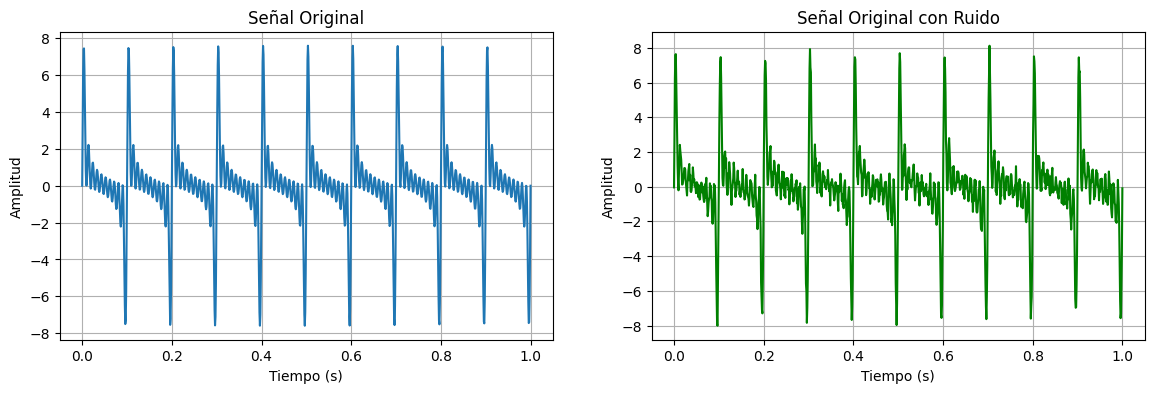

In [ ]:
# Parámetros
fs = 1000  # Frecuencia de muestreo en Hz
t = 1  # Duración de la señal en segundos
fqs = np.arange(10,110,10)  # Frecuencias en la señal (10, 20, ..., 100 Hz)
noise = 0.3  # Desviación estándar del ruido blanco gaussiano

# Generar la señal con varias frecuencias
ts = np.linspace(0, t, fs*t)
s = sum(np.sin(2 * np.pi * f * ts) for f in fqs)

# Agregar ruido blanco gaussiano
ns = s + np.random.normal(0, noise, len(ts))

plt.figure(figsize=(14, 4))
# Señal original
plt.subplot(1, 2, 1)
plt.plot(ts, s)
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.title("Señal Original")
plt.grid()
# Señal original con ruido
plt.subplot(1, 2, 2)
plt.plot(ts, ns, color= 'g')
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.title("Señal Original con Ruido")
plt.grid()

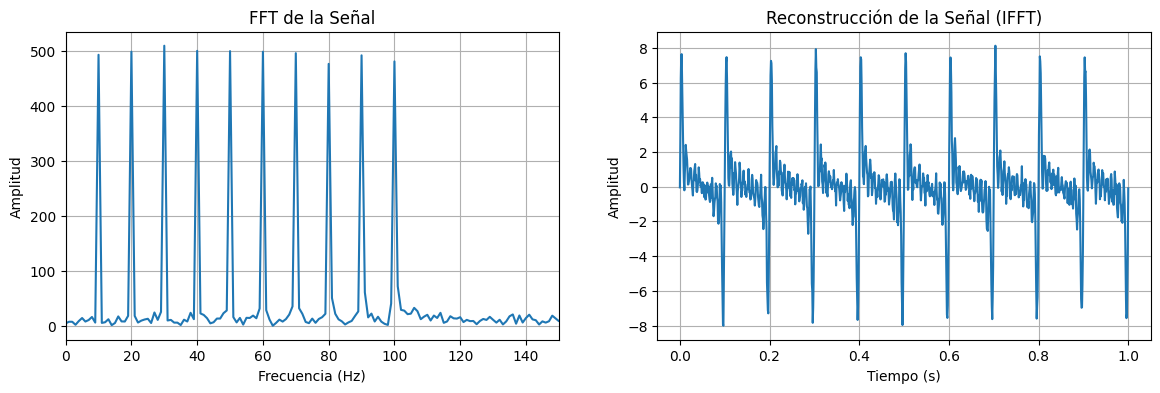

In [ ]:
# Calcular FFT de la señal
W = np.fft.fft(ns)
freqs = np.fft.fftfreq(len(W), 1 / fs)

# Calcular la señal original desde la FFT (usando IFFT)
RSignal = np.fft.ifft(W)

plt.figure(figsize=(14, 4))
# FFT
plt.subplot(1, 2, 1)
plt.plot(freqs[:len(freqs)//2], np.abs(W[:len(W)//2]))
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Amplitud")
plt.title("FFT de la Señal")
plt.xlim(0,150)
plt.grid()
# Reconstrucción de la señal original desde FFT
plt.subplot(1, 2, 2)
plt.plot(ts, RSignal.real)
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.title("Reconstrucción de la Señal (IFFT)")
plt.grid()

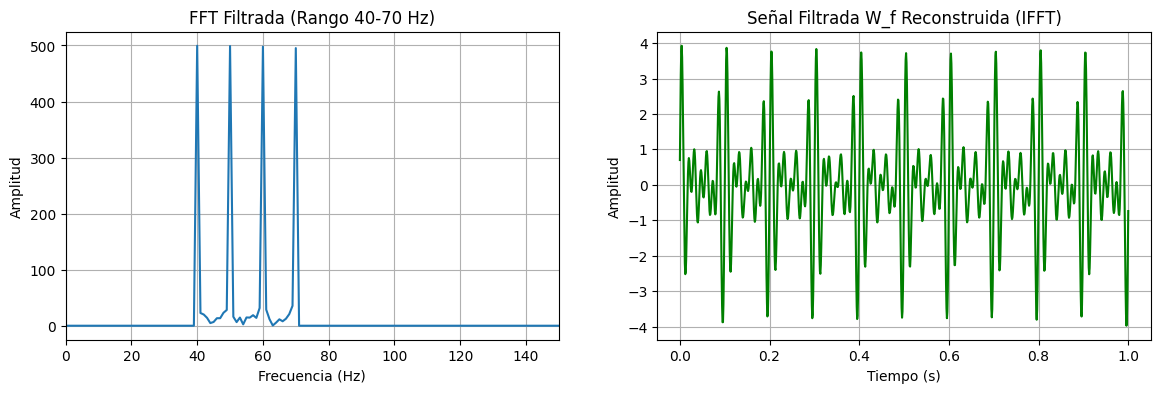

In [ ]:
# Definir el rango de frecuencias permitido
low_cutoff = 40  # Frecuencia mínima permitida (Hz)
high_cutoff = 70  # Frecuencia máxima permitida (Hz)

# Crear el filtro tipo escalón
W_f = W.copy()
mask = (np.abs(freqs) >= low_cutoff) & (np.abs(freqs) <= high_cutoff)
W_f[~mask] = 0  # Poner a cero las frecuencias fuera del rango

# Reconstruir la señal filtrada usando la IFFT
s_filt = np.fft.ifft(W_f)

plt.figure(figsize=(14, 4))
# FFT Filtrada
plt.subplot(1, 2, 1)
plt.plot(freqs[:len(freqs)//2], np.abs(W_f[:len(W_f)//2]))
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Amplitud")
plt.title("FFT Filtrada (Rango 40-70 Hz)")
plt.xlim(0,150)
plt.grid()
# Señal filtrada en el dominio del tiempo
plt.subplot(1, 2, 2)
plt.plot(ts, s_filt.real, color ='g')
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.title("Señal Filtrada W_f Reconstruida (IFFT)")
plt.grid()